In [2]:
import numpy as np
import os
CurrentPath = os.getcwd()
data_1 = np.loadtxt(CurrentPath + '/2025/data_1.txt', delimiter=' ')
data_1_X = data_1.T[0];data_1_Y = data_1.T[1]; data_1_var = data_1.T[2]

In [3]:
from scipy.optimize import curve_fit
def cube(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d
popt, _ = curve_fit(cube, data_1_X, data_1_Y, sigma = np.sqrt(data_1_var))
popt

array([ 0.74999955, -2.49990086,  6.79437875, 17.04649144])

In [4]:
paramA = np.arange(popt[0]-0.01,popt[0]+0.01,0.0001)
paramB = np.arange(popt[1]-0.01,popt[1]+0.01,0.0001)
paramC = np.arange(popt[2]-0.01,popt[2]+0.01,0.0001)
paramD = np.arange(popt[3]-0.01,popt[3]+0.01,0.0001)


gridA, gridB, gridC, gridD = np.meshgrid(paramA, paramB, paramC, paramD)
def chisqCube(gridA, gridB, gridC, gridD, X, Y, var): # chisquare for quadratic function
    chisq = np.zeros_like(gridA)
    for i, Xval in enumerate(X):
        print(Xval, Y[i])
        Ytheory = cube(Xval, gridA, gridB, gridC, gridD)
        chisq += (Y[i] - Ytheory)**2/var[i]
    return chisq

In [5]:
arr = chisqCube(gridA, gridB, gridC,gridD, data_1_X, data_1_Y, data_1_var)


: 

: 

: 

In [5]:
np.save('chisqCube', arr)
arr = np.load('chisqCube.npy')
minchisq = arr.min()
bestfitind = np.unravel_index(np.argmin(arr), arr.shape)
maxLikelihood = np.exp(-minchisq/2)
def Likelihood(chisq):
    return np.exp(-chisq/2)/maxLikelihood
arrLikelihood = Likelihood(arr)


In [16]:
minchisq

3.3469689518084604

In [6]:
abSpace = np.sum(arrLikelihood, axis=(2,3))

In [14]:
abSpace[bestfitind[0],bestfitind[1]]

498.5213879435141

ValueError: Contour levels must be increasing

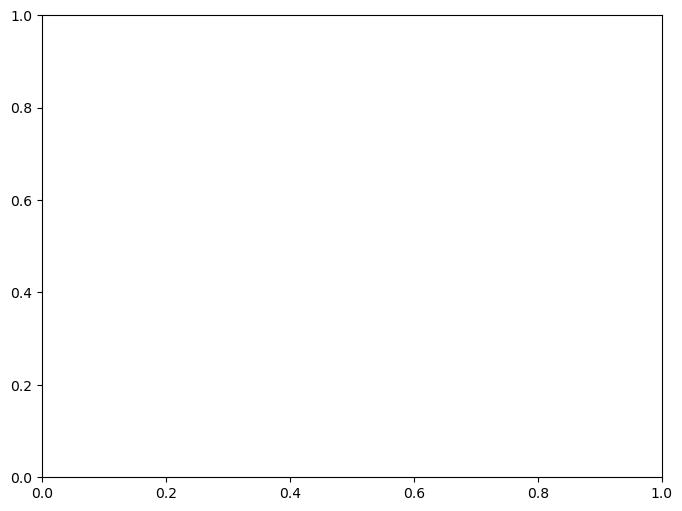

In [7]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(paramA, paramB)

# 그리드에서의 면적 요소 계산 (delta_ij)
dx = paramA[1] - paramA[0]
dy = paramB[1] - paramB[0]
delta_ij = dx * dy

# 정규화 (전체 확률이 1이 되도록 조정)
total_prob = np.sum(abSpace * delta_ij)
Z_norm = abSpace / total_prob

# Z 값을 1D로 변환 후 내림차순 정렬
Z_flat = np.sort(Z_norm.ravel())[::-1]
Z_cumsum = np.cumsum(Z_flat * delta_ij)

# 68% (1-sigma), 95% (2-sigma) 신뢰구간 레벨 찾기
sigma_1 = Z_flat[np.searchsorted(Z_cumsum, 0.68)]
sigma_2 = Z_flat[np.searchsorted(Z_cumsum, 0.95)]

# Contour 플로팅
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z_norm, levels=[sigma_2, sigma_1], colors=['blue', 'red'])
plt.clabel(contour, inline=True, fontsize=8)
plt.title('1-Sigma (Red) and 2-Sigma (Blue) Contour')
plt.xlabel('paramA')
plt.ylabel('paramB')
plt.colorbar(label='Normalized Density')
plt.show()

In [10]:
total_prob

0.0004985213879434596

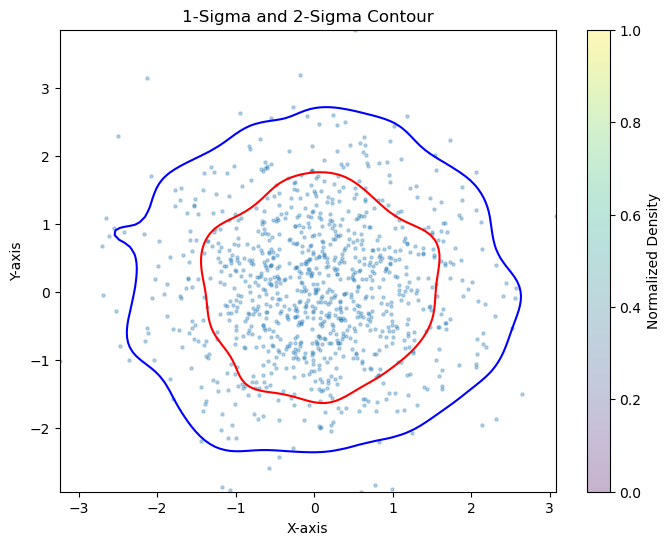

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 예제 2D grid 데이터 생성
np.random.seed(42)
abSpace = np.random.randn(1000, 2)  # 2D 분포 샘플

# 2D 히스토그램 생성
x = abSpace[:, 0]
y = abSpace[:, 1]
kde = gaussian_kde(np.vstack([x, y]))

# 그리드 설정
x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# 그리드에서의 면적 요소 계산
dx = (x_grid[1] - x_grid[0])
dy = (y_grid[1] - y_grid[0])
delta_ij = dx * dy

# 정규화
total_prob = np.sum(Z * delta_ij)
Z_norm = Z / total_prob
Z_flat = np.sort(Z_norm.ravel())[::-1]
Z_cumsum = np.cumsum(Z_flat * delta_ij)

# 1-sigma (68%) 및 2-sigma (95%) 경계 찾기
sigma_1 = Z_flat[np.searchsorted(Z_cumsum, 0.68)]
sigma_2 = Z_flat[np.searchsorted(Z_cumsum, 0.95)]

# Contour 플로팅
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z_norm, levels=[sigma_2, sigma_1], colors=['blue', 'red'])
plt.scatter(x, y, s=5, alpha=0.3)
plt.title('1-Sigma and 2-Sigma Contour')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Normalized Density')
plt.show()

In [59]:
kde